```
导包，np
从numpy.fft导入fft、ifft
导入图片库PIL中的Image
```

In [1]:
#第一步读取数据
import numpy as np
# fft 傅里叶转换 ，ifft 傅里叶反转
from numpy.fft import fft,ifft
from PIL import Image

In [32]:
cat = Image.open('./image/cat.jpg')

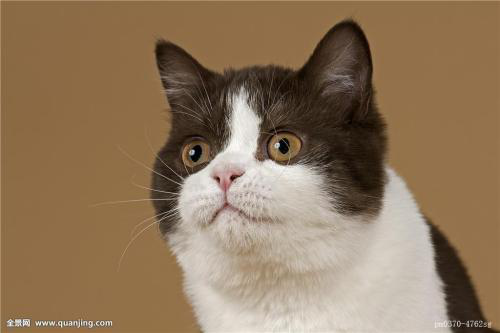

In [33]:
cat

In [34]:
#转换成int类型数据，int8 == 128
cat_data = np.fromstring(cat.tobytes(),dtype=np.int8)
#之所以有负数，是因为int8<128，颜色值0—255
cat_data

F:\soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


array([-59, -91, 127, ...,  58,  42,  16], dtype=int8)

In [25]:
#傅里叶转换，傅里叶转换的结果包含实数和虚数
cat_data_fft = fft(cat_data)
#将真实数据转换成频域
cat_data_fft

array([-42995951.        -1.52287164e-11j,
          -99178.22831775+2.60571347e+06j,
        -3813880.882645  -1.06144014e+06j, ...,
        -3427310.78483525+7.15947593e+06j,
        -3813880.882645  +1.06144014e+06j,
          -99178.22831775-2.60571347e+06j])

In [26]:
#将傅里叶的数据去除低频的波，设置为0
np.where(np.abs(cat_data_fft)<1e5,0,cat_data_fft)

array([-42995951.        -1.52287164e-11j,
          -99178.22831775+2.60571347e+06j,
        -3813880.882645  -1.06144014e+06j, ...,
        -3427310.78483525+7.15947593e+06j,
        -3813880.882645  +1.06144014e+06j,
          -99178.22831775-2.60571347e+06j])

In [27]:
#使用傅里叶进行反转
cat_data_ifft = ifft(cat_data_fft)
cat_data_ifft

array([ -28.-6.07794205e-14j,  -30.-3.58360269e-14j,
        -27.-5.40369833e-14j, ...,  -72.+4.73579158e-14j,
       -100.-8.57387163e-15j, -121.+8.21274859e-15j])

In [28]:
#获取实数
cat_data_real = np.real(cat_data_ifft)
cat_data_real

array([ -28.,  -30.,  -27., ...,  -72., -100., -121.])

In [29]:
#去除小数部分
cat_data_result = np.int8(cat_data_real)
cat_data_result

array([ -28,  -30,  -27, ...,  -71,  -99, -120], dtype=int8)

In [30]:
#将一维数组通过Image进行转换，重新生成图片
cat_Image = Image.frombytes(size=cat.size,mode=cat.mode,data=cat_data_result)

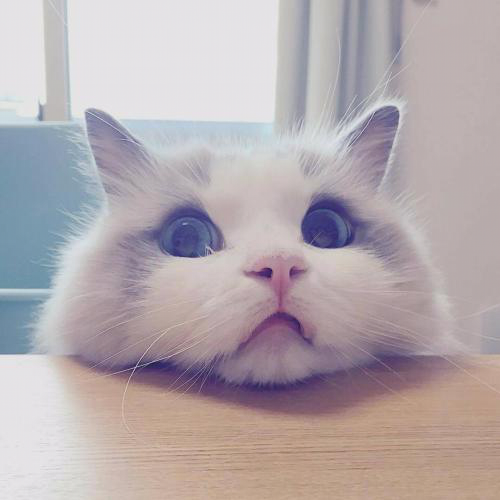

In [31]:
#显示图片
cat_Image